In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y, y_predict):
    "This function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'landed'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [5]:
# Load the data
import pandas as pd
import requests
from io import StringIO

# URL for the first dataset
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Download the data with SSL verification disabled
response = requests.get(URL1, verify=False)

# Convert the response to a DataFrame
data = pd.read_csv(StringIO(response.text))

# Display the first few rows
data.head()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
# Load the second dataset
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
response = requests.get(URL2, verify=False)
X = pd.read_csv(StringIO(response.text))

# Display the first few rows of X
X.head(100)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [7]:
# TASK 1: Create a NumPy array from the column 'Class' and assign it to Y
Y = data['Class'].to_numpy()

# Display the first 5 values to verify
print(Y[:5])

[0 0 0 0 0]


In [8]:
# TASK 2: Standardize the data in X
from sklearn import preprocessing

# Create the scaler
transform = preprocessing.StandardScaler()

# Apply the transformation to X and reassign to X
X = transform.fit_transform(X)

# Display the shape of X to verify
print("Forma de X después de la estandarización:", X.shape)

Forma de X después de la estandarización: (90, 83)


In [9]:
# TASK 3: Split the data into training and test sets
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Display the number of test samples
print("Cantidad de muestras en Y_test:", Y_test.shape)

Cantidad de muestras en Y_test: (18,)


In [10]:
# TASK 4: Create a logistic regression model and optimize hyperparameters with GridSearchCV
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

# Create the logistic regression model
lr = LogisticRegression()

# Create the GridSearchCV object with cv=10
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the model to find the best parameters
logreg_cv.fit(X_train, Y_train)

# Display the best parameters and accuracy
print("Tuned hyperparameters for Logistic Regression:", logreg_cv.best_params_)
print("Accuracy for Logistic Regression (validation):", logreg_cv.best_score_)

Tuned hyperparameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (validation): 0.8464285714285713


Accuracy on test data for Logistic Regression: 0.8333333333333334


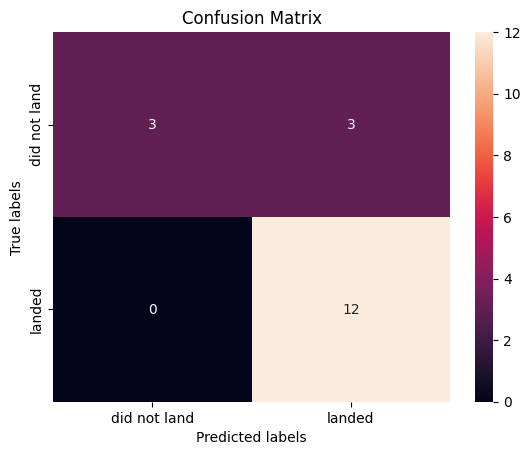

In [11]:
# TASK 5: Calculate the accuracy on the test data and plot the confusion matrix
from sklearn.metrics import accuracy_score

# Predict on the test set
yhat = logreg_cv.predict(X_test)

# Calculate the accuracy on the test set
accuracy_logreg = accuracy_score(Y_test, yhat)
print("Accuracy on test data for Logistic Regression:", accuracy_logreg)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)

In [12]:
# TASK 6: Create a support vector machine model and optimize hyperparameters with GridSearchCV
parameters = {'kernel': ['linear', 'rbf', 'poly', 'rbf', 'sigmoid'],
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}

# Create the SVM model
svm = SVC()

# Create the GridSearchCV object with cv=10
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the model to find the best parameters
svm_cv.fit(X_train, Y_train)

# Display the best parameters and accuracy
print("Tuned hyperparameters for SVM (best parameters):", svm_cv.best_params_)
print("Accuracy for SVM (validation):", svm_cv.best_score_)

Tuned hyperparameters for SVM (best parameters): {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Accuracy for SVM (validation): 0.8482142857142856


Accuracy on test data for SVM: 0.8333333333333334


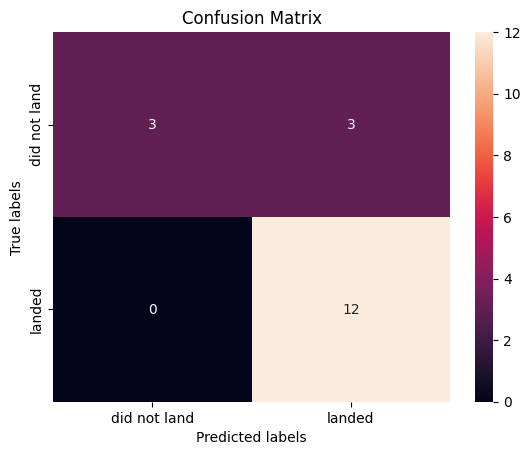

In [13]:
# TASK 7: Calculate the accuracy on the test data for SVM and plot the confusion matrix
# Predict on the test set
yhat_svm = svm_cv.predict(X_test)

# Calculate the accuracy on the test set
accuracy_svm = accuracy_score(Y_test, yhat_svm)
print("Accuracy on test data for SVM:", accuracy_svm)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat_svm)

In [14]:
# TASK 8: Create a decision tree model and optimize hyperparameters with GridSearchCV
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

# Create the Decision Tree model
tree = DecisionTreeClassifier()

# Create the GridSearchCV object with cv=10
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the model to find the best parameters
tree_cv.fit(X_train, Y_train)

# Display the best parameters and accuracy
print("Tuned hyperparameters for Decision Tree (best parameters):", tree_cv.best_params_)
print("Accuracy for Decision Tree (validation):", tree_cv.best_score_)

Tuned hyperparameters for Decision Tree (best parameters): {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy for Decision Tree (validation): 0.8732142857142857


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~

Accuracy on test data for Decision Tree: 0.6111111111111112


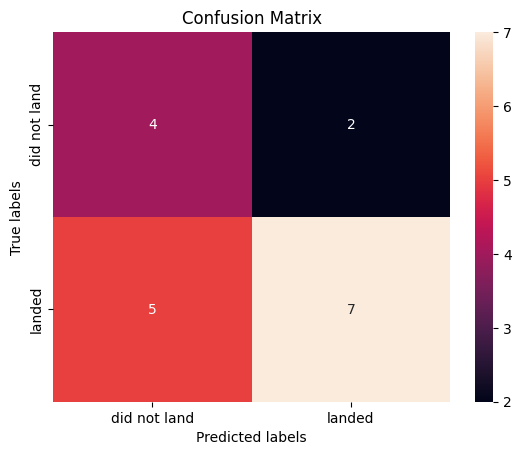

In [15]:
# TASK 9: Calculate the accuracy on the test data for Decision Tree and plot the confusion matrix
# Predict on the test set
yhat_tree = tree_cv.predict(X_test)

# Calculate the accuracy on the test set
accuracy_tree = accuracy_score(Y_test, yhat_tree)
print("Accuracy on test data for Decision Tree:", accuracy_tree)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat_tree)

In [16]:
# TASK 10: Create a KNN model and optimize hyperparameters with GridSearchCV
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Create the KNN model
knn = KNeighborsClassifier()

# Create the GridSearchCV object with cv=10
knn_cv = GridSearchCV(knn, parameters, cv=10)

# Fit the model to find the best parameters
knn_cv.fit(X_train, Y_train)

# Display the best parameters and accuracy
print("Tuned hyperparameters for KNN (best parameters):", knn_cv.best_params_)
print("Accuracy for KNN (validation):", knn_cv.best_score_)

Tuned hyperparameters for KNN (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy for KNN (validation): 0.8482142857142858


Accuracy on test data for KNN: 0.8333333333333334


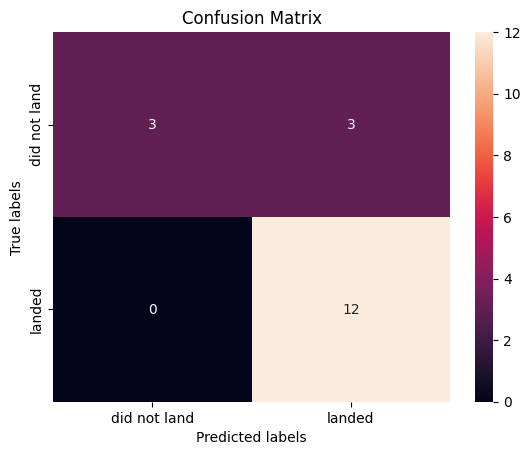

In [17]:
# TASK 11: Calculate the accuracy on the test data for KNN and plot the confusion matrix
# Predict on the test set
yhat_knn = knn_cv.predict(X_test)

# Calculate the accuracy on the test set
accuracy_knn = accuracy_score(Y_test, yhat_knn)
print("Accuracy on test data for KNN:", accuracy_knn)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat_knn)

In [18]:
# TASK 12: Find the method that performs best
# Compare the performance of all models
print("Model Comparison (Accuracy on Test Data):")
print("Logistic Regression:", accuracy_logreg)
print("SVM:", accuracy_svm)
print("Decision Tree:", accuracy_tree)
print("KNN:", accuracy_knn)

# Determine the best model
accuracies = {
    'Logistic Regression': accuracy_logreg,
    'SVM': accuracy_svm,
    'Decision Tree': accuracy_tree,
    'KNN': accuracy_knn
}

best_model = max(accuracies, key=accuracies.get)
print(f"\nThe best model is {best_model} with an accuracy of {accuracies[best_model]}")

Model Comparison (Accuracy on Test Data):
Logistic Regression: 0.8333333333333334
SVM: 0.8333333333333334
Decision Tree: 0.6111111111111112
KNN: 0.8333333333333334

The best model is Logistic Regression with an accuracy of 0.8333333333333334


Accuracy on test data for Decision Tree: 0.6111111111111112


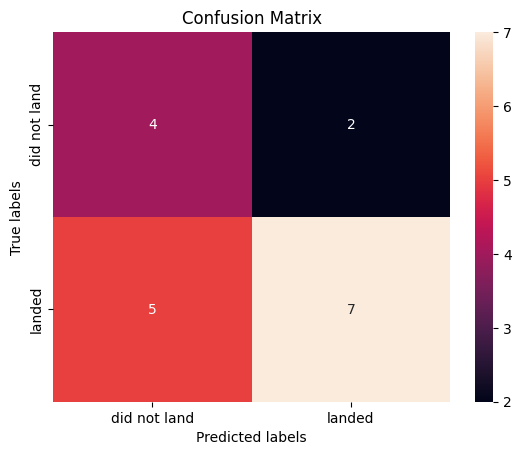

In [19]:
# TASK 9: Calculate the accuracy on the test data for Decision Tree and plot the confusion matrix
from sklearn.metrics import accuracy_score

# Predict on the test set
yhat = tree_cv.predict(X_test)

# Calculate the accuracy on the test set
accuracy_tree = accuracy_score(Y_test, yhat)
print("Accuracy on test data for Decision Tree:", accuracy_tree)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)

In [20]:
# TASK 10: Create a KNN model and optimize hyperparameters with GridSearchCV
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Create the KNN model
knn = KNeighborsClassifier()

# Create the GridSearchCV object with cv=10
knn_cv = GridSearchCV(knn, parameters, cv=10)

# Fit the model to find the best parameters
knn_cv.fit(X_train, Y_train)

# Display the best parameters and accuracy
print("Tuned hyperparameters for KNN (best parameters):", knn_cv.best_params_)
print("Accuracy for KNN (validation):", knn_cv.best_score_)

Tuned hyperparameters for KNN (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy for KNN (validation): 0.8482142857142858


Accuracy on test data for KNN: 0.8333333333333334


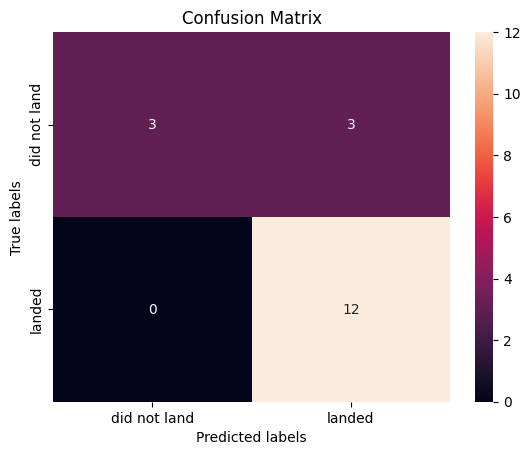

In [21]:
# TASK 11: Calculate the accuracy on the test data for KNN and plot the confusion matrix
# Predict on the test set
yhat = knn_cv.predict(X_test)

# Calculate the accuracy on the test set
accuracy_knn = accuracy_score(Y_test, yhat)
print("Accuracy on test data for KNN:", accuracy_knn)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)

In [23]:
# TASK 12: Find the method that performs best
# Compare the performance of all models
print("Model Comparison (Accuracy on Test Data):")
print("Logistic Regression:", accuracy_logreg)
print("SVM:", accuracy_svm)
print("Decision Tree:", accuracy_tree)
print("KNN:", accuracy_knn)

# Determine the best model
accuracies = {
    'Logistic Regression': accuracy_logreg,
    'SVM': accuracy_svm,
    'Decision Tree': accuracy_tree,
    'KNN': accuracy_knn
}

best_model = max(accuracies, key=accuracies.get)
print(f"\nThe best model is {best_model} with an accuracy of {accuracies[best_model]}")

Model Comparison (Accuracy on Test Data):
Logistic Regression: 0.8333333333333334
SVM: 0.8333333333333334
Decision Tree: 0.6111111111111112
KNN: 0.8333333333333334

The best model is Logistic Regression with an accuracy of 0.8333333333333334
